# Homework #2 (due 10th of November, 11:59 PM):

In [72]:
#Lets do the importations
import pandas as pd
import numpy as np
from sklearn import datasets
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree as tr


In [73]:
#Load the breast cancer dataset
data = datasets.load_breast_cancer()

In [74]:
#I put the breast cancer dataset into the dataframe in order to show the features and target of the breast cancer dataset
cancer_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])
display(cancer_df)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [75]:
#Get the correlation with the corr function to obtain values to scatter the plot
corr_matrix = cancer_df.corr()
print(corr_matrix)

                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -

Text(0, 0.5, 'mean smoothness')

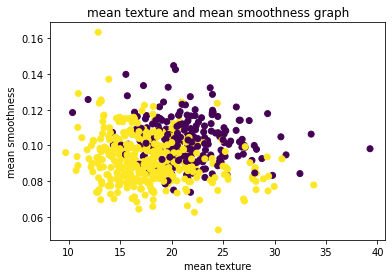

In [76]:
#Mean texture and mean smoothness have negative low correlation, which means weaker linear relationship
#Yellow dots represent 0 and purple dots represent 1
pyplot.title("mean texture and mean smoothness graph")
d=datasets.load_breast_cancer(return_X_y=True)  
pyplot.scatter(x=d[0][::,1],y=d[0][::,4],c=d[1])
pyplot.xlabel('mean texture')
pyplot.ylabel('mean smoothness')

Text(0, 0.5, 'mean perimeter')

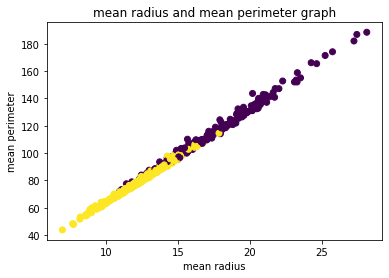

In [77]:
#Mean radius and mean perimeter have positive high correlation, which means stronger linear relationship
#Yellow dots represent 0 and purple dots represent 1
pyplot.title("mean radius and mean perimeter graph")
pyplot.scatter(x=d[0][::,0],y=d[0][::,2],c=d[1])
pyplot.xlabel('mean radius')
pyplot.ylabel('mean perimeter')


Text(0, 0.5, 'smoothness error')

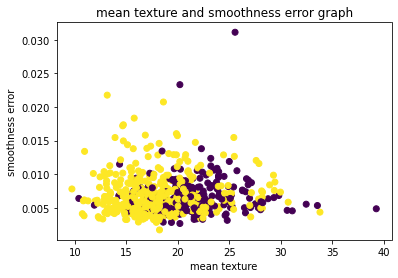

In [78]:
#Mean texture and smoothness error have positive low correlation, which means weaker linear relationship
#Yellow dots represent 0 and purple dots represent 1
pyplot.title("mean texture and smoothness error graph")
pyplot.scatter(x=d[0][::,1],y=d[0][::,14],c=d[1])
pyplot.xlabel('mean texture')
pyplot.ylabel('smoothness error')

<AxesSubplot:>

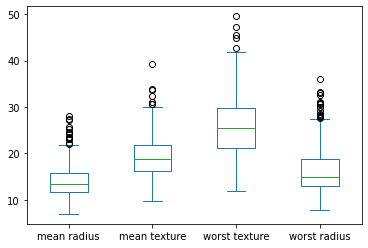

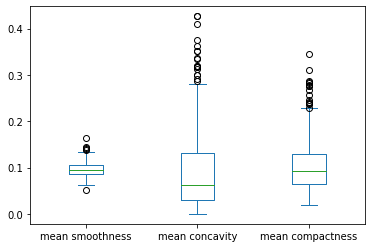

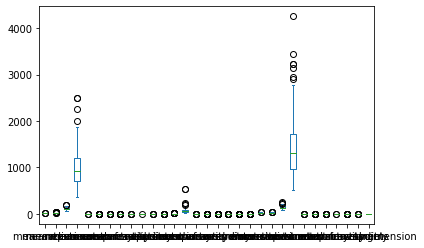

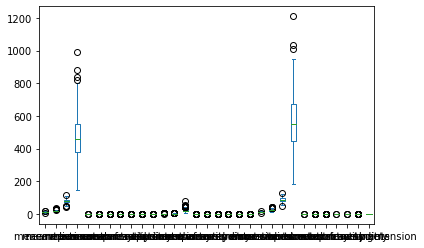

In [79]:
#Use box plots to look at the some of the data
cancer_df[['mean radius','mean texture','worst texture','worst radius']].plot.box()
cancer_df[['mean smoothness','mean concavity','mean compactness']].plot.box()   
cancer_df[cancer_df['target']==0].plot.box()
cancer_df[cancer_df['target']==1].plot.box()
 

In [80]:
#Create training and test set with shuffling
train_df, test_df = train_test_split(cancer_df,random_state=0) 

In [81]:
#Create an instance of the class Decision Tree Classifier, which will represent the decision tree
#Train a decision tree classifier and as a bonus, plot it
tree = DecisionTreeClassifier()
tree.fit(train_df.drop('target', axis=1), train_df['target'])  

DecisionTreeClassifier()

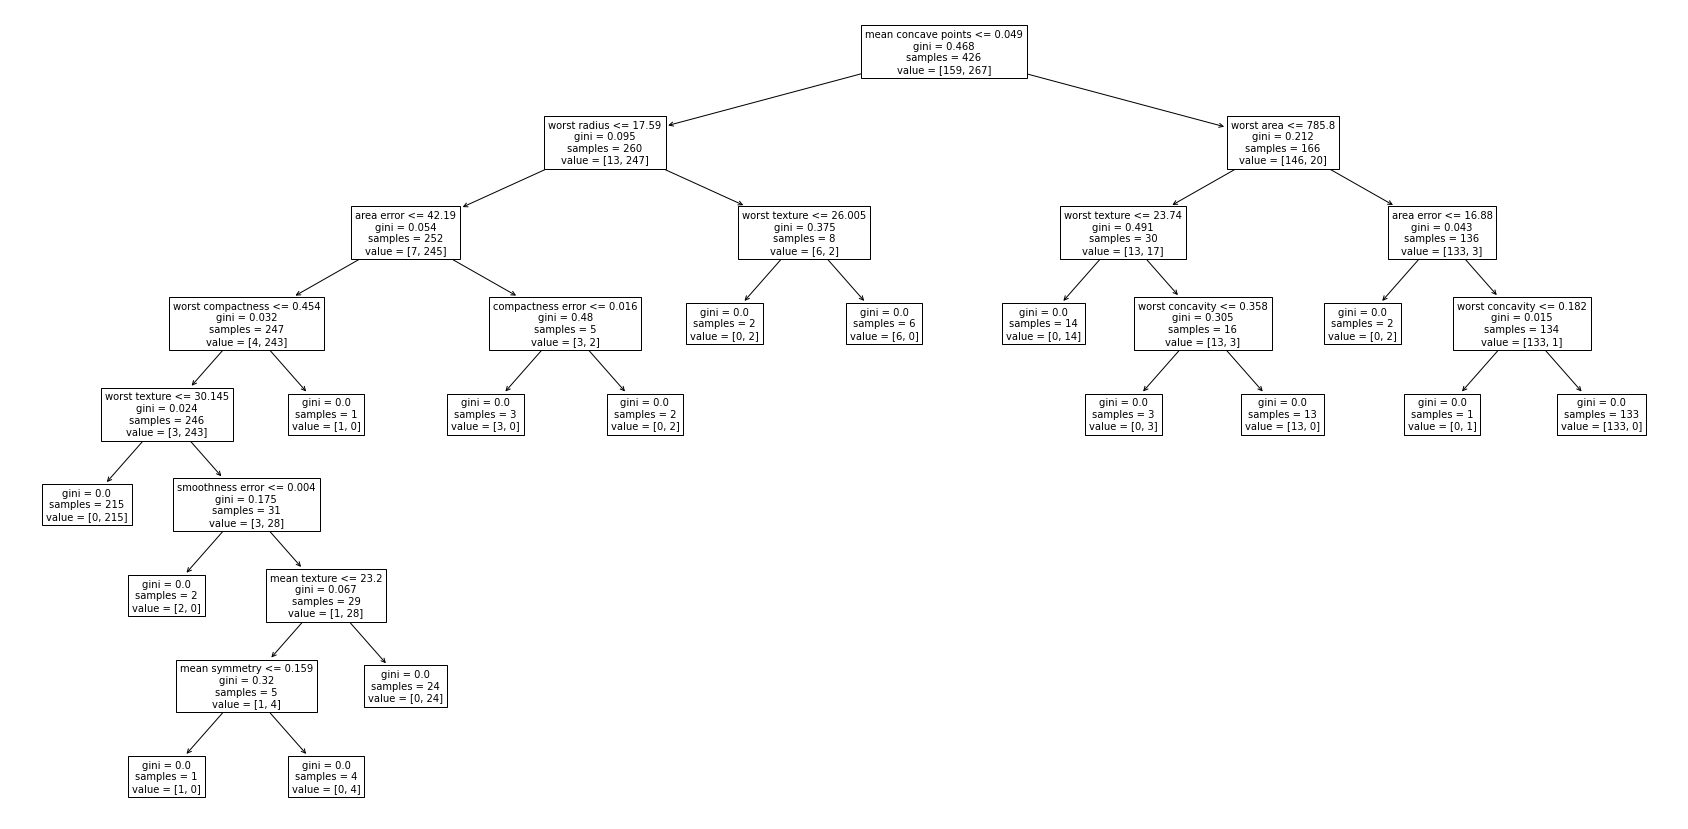

In [82]:
pyplot.figure(figsize=(30,15))
tr.plot_tree(tree, feature_names=data['feature_names'], fontsize=10)
pyplot.show()

In [83]:
#Display the important features
tree.feature_importances_


array([0.        , 0.0016609 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.69955965, 0.0080277 , 0.        ,
       0.        , 0.        , 0.        , 0.03624125, 0.017502  ,
       0.01204155, 0.        , 0.        , 0.        , 0.        ,
       0.04058449, 0.06706044, 0.        , 0.07315114, 0.        ,
       0.00975173, 0.03441914, 0.        , 0.        , 0.        ])

In [84]:
#To observe importan features better, put them in a dataframe
#Top 5 the most important features are: mean concave points, worst area, worst texture, worst radius, area error
#Everytime i run the code, the values change. Therefore, top 5 most important features change
x = cancer_df.drop('target',axis=1)
df_tree =pd.DataFrame({'Feature_names':x.columns,'Importances':tree.feature_importances_})
display(df_tree)


,Feature_names,Importances
0,mean radius,0.000000
1,mean texture,0.001661
2,mean perimeter,0.000000
3,mean area,0.000000
4,mean smoothness,0.000000
5,mean compactness,0.000000
6,mean concavity,0.000000
7,mean concave points,0.699560
8,mean symmetry,0.008028
9,mean fractal dimension,0.000000


In [85]:
#Create an instance of the class Logistic Regression, which will represent the regression model
#Train a logistic regeression model
lr = LogisticRegression(C=0.01, max_iter=1000)
lr.fit(train_df.drop(['target'], axis=1),train_df['target'])  

LogisticRegression(C=0.01, max_iter=1000)

By looking at the score results one can observe that logistic regression performs better on the test set.
(Everytime i run the code, the scores change. Therefore the answer will change.)

In [86]:
tree.score(test_df.drop('target',axis=1), test_df['target'])

0.8951048951048951

In [87]:
lr.score(test_df.drop('target',axis=1), test_df['target'])  

0.9440559440559441

### Part 2)

- Get *winequality_white.csv* which uploaded with the Homework file.

- Last column (quality) is the target variable.

- Train a decision tree regressor using the training set. Try different 'min_samples_split' and 'max_depth' parameters. Which ones worked best on the test set? What is the MSE on the test set with the best parameters.

In [88]:
#Get winequality_white.csv
data_2 = pd.read_csv('winequality_white.csv',sep=';')

In [89]:
#Put it to the dataframe and change quality to target, observe the features
data_2.rename(columns = {'quality':'target'}, inplace = True)
display(data_2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [90]:
#Get the training set with shuffling
data_2_train, data_2_test = train_test_split(data_2,random_state=0)

By looking at the score results one can observe that when max depth is 5, it works best on the test set.
(Everytime i run the code, the scores change. Therefore the answer will change.)

In [91]:
#Train a decision tree regressor by trying different max depth and min samples split values
#First, try to find max depth while assigning min samples split a constant value of 5
mdepths = [2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 20]
errors = np.zeros(11)
index = 0

for d in mdepths:
    tree_reg = DecisionTreeRegressor(max_depth=d, min_samples_split=5)
    tree_reg.fit(data_2_train.drop('target',axis=1),data_2_train['target'])
    u=tree_reg.score(data_2_test.drop('target',axis=1), data_2_test['target'])
    errors[index]=u
    index+=1

a = 0
for i in mdepths:
    print("max depth:",i)
    print("score:",errors[a])
    a = a+1


max depth: 2
score: 0.22777780804632197
max depth: 3
score: 0.2728593774861038
max depth: 4
score: 0.30629161446160336
max depth: 5
score: 0.3146076228113712
max depth: 6
score: 0.302413875665005
max depth: 7
score: 0.2956269920165877
max depth: 8
score: 0.28506307342540016
max depth: 10
score: 0.19805843265596434
max depth: 12
score: 0.10232881946933237
max depth: 15
score: 0.11369990635835181
max depth: 20
score: 0.09694950509760136


By looking at the score results one can observe that when min samples split is 5, it works best on the test set. Moreover, when we assign max depth as 5 (best max depth value) min samples split becomes 5 which is equal to max depth.
(Everytime i run the code, the scores change. Therefore the answer will change.)

In [96]:
##First, try to find min sample split while assigning max depth a constant value of 5 (also 5 is the best max depth value)
msplit = [2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 20]
errors_2 = np.zeros(11)
index_2=0

for d in msplit:
    tree_reg_2 = DecisionTreeRegressor(max_depth=5, min_samples_split=d)
    tree_reg_2.fit(data_2_train.drop('target',axis=1),data_2_train['target'])
    u_2=tree_reg_2.score(data_2_test.drop('target',axis=1), data_2_test['target'])
    errors_2[index_2]=u_2
    index_2+=1
    
a_2 = 0
for i in mdepths:
    print("min samples split:",i)
    print("score:",errors[a_2])
    a_2 = a_2+1


min samples split: 2
score: 0.22777780804632197
min samples split: 3
score: 0.2728593774861038
min samples split: 4
score: 0.30629161446160336
min samples split: 5
score: 0.3146076228113712
min samples split: 6
score: 0.302413875665005
min samples split: 7
score: 0.2956269920165877
min samples split: 8
score: 0.28506307342540016
min samples split: 10
score: 0.19805843265596434
min samples split: 12
score: 0.10232881946933237
min samples split: 15
score: 0.11369990635835181
min samples split: 20
score: 0.09694950509760136


In [101]:
#MSE on the test set with the best parameters:
tree_reg_best = DecisionTreeRegressor(max_depth=5, min_samples_split=5)
tree_reg_best.fit(data_2_train.drop('target',axis=1),data_2_train['target'])
mean_squared_error(tree_reg_best.predict(data_2_test.drop('target',axis=1)), data_2_test['target'])

0.5321152338296223